In [65]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [4]:
batch_size = 64
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 337s - loss: 0.2598 - acc: 0.9213 - val_loss: 0.0651 - val_acc: 0.9798
Epoch 2/4
60000/60000 [==============================] - 395s - loss: 0.1008 - acc: 0.9708 - val_loss: 0.0531 - val_acc: 0.9816
Epoch 3/4
60000/60000 [==============================] - 394s - loss: 0.0760 - acc: 0.9779 - val_loss: 0.0404 - val_acc: 0.9865
Epoch 4/4
60000/60000 [==============================] - 391s - loss: 0.0664 - acc: 0.9807 - val_loss: 0.0371 - val_acc: 0.9867
Test loss: 0.0371234607728
Test accuracy: 0.9867


In [49]:
%load_ext autoreload
%autoreload 2


from PDA import PDA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
netname = 'mnist'
#path_data = './test_data'
classnames = list(map(str, range(0, 10)))

# is running in gpu mode?
gpu = False

# window size (i.e., the size of the pixel patch that is marginalised out in each step)
win_size = 3               # k in alg 1 (see paper)

# indicate whether windows should be overlapping or not
overlapping = True

# settings for sampling 
sample_style = 'conditional' # choose: conditional / marginal
num_samples = 10
padding_size = 3            # important for conditional sampling,
                            # l = win_size+2*padding_size in alg 1
                            # (see paper)

# set the batch size - the larger, the faster computation will be
batch_size = 64

In [72]:
#to train sampler we need a list of images
x_im = x_train.reshape(x_train.shape[0], img_rows, img_cols)
x_im.shape

(60000, 28, 28)

In [73]:
pda = PDA(netname, model, x_im, classnames, win_size, padding_size, gpu, batch_size,
          overlapping, sample_style, num_samples)

In [74]:
ind = 3
pred_diffs = pda.run(x_im[ind])

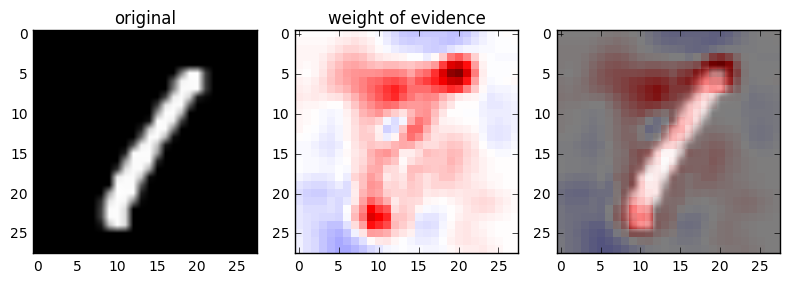

In [75]:
pda.plot(x_im[ind], pred_diffs[0], class_indx=1)

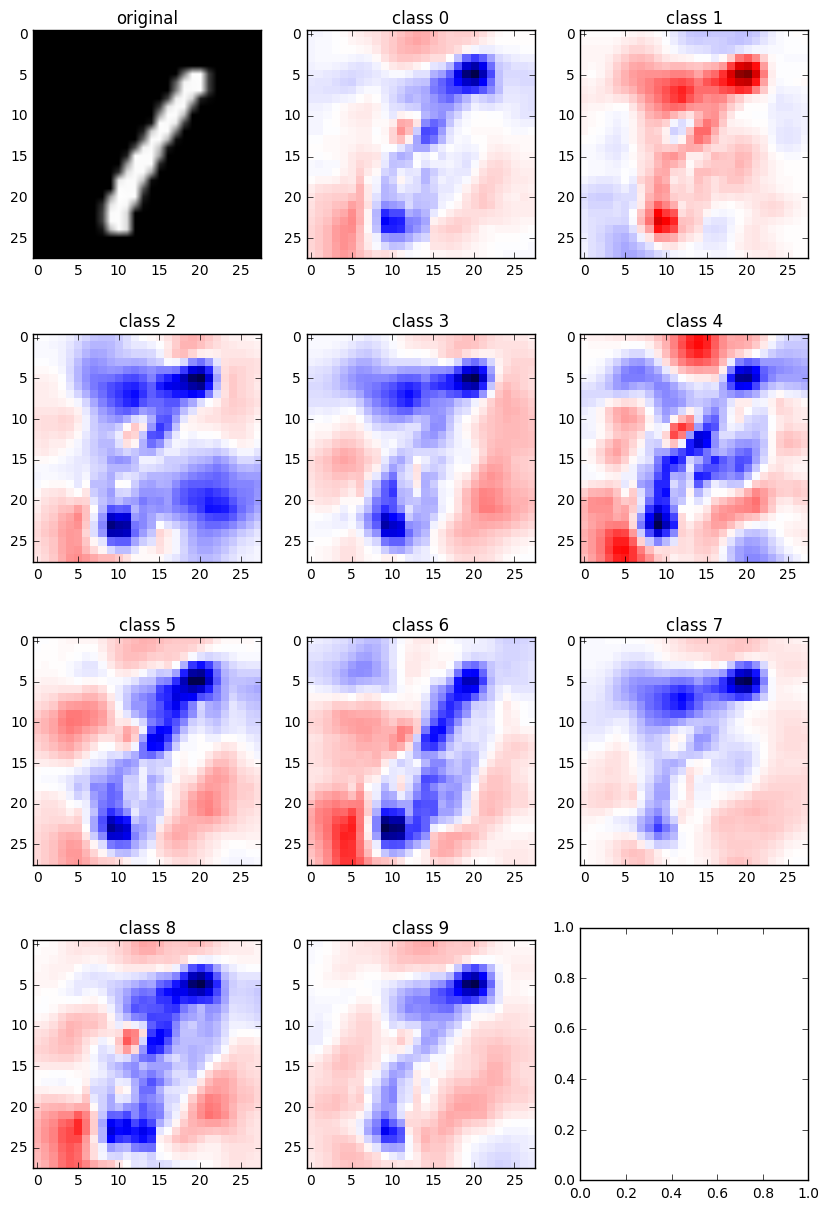

In [76]:
pda.plot_maps(x_im[ind], pred_diffs[0])